In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Perceptron
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from keras.callbacks import LearningRateScheduler
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

In [219]:
mushroom_data=pd.read_csv("mushrooms.csv")#Read the whole data
Mushroom_DataBayes=mushroom_data
mushroom_data.head()#display first 5 instances

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [220]:
mushroom_target=mushroom_data["class"].apply(lambda x : 1 if x == "p" else 0)#
mushroom_data=mushroom_data.drop(["veil-type","veil-color","ring-number","gill-attachment"],axis=1)

columns=np.array(mushroom_data.columns)



In [221]:
mushroom_features=mushroom_data.drop(["class"],axis=1)#drop the target class column
print("The features are -",mushroom_features.columns)

The features are - Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [222]:
#######Data Preprocessing#####
one_hot=OneHotEncoder()
mushroom_coded_value=one_hot.fit_transform(mushroom_features)
mushroom_coded_value=mushroom_coded_value.toarray()#converting sparse matrix to numpy array


columns=columns.reshape((-1,1))
categorical_features=columns
########Giving proper names to columns after encoding#####
onehot_feat_names=OneHotEncoder(handle_unknown='ignore')
mushroom_fullcoded=onehot_feat_names.fit_transform(mushroom_data)
cat_names=onehot_feat_names.get_feature_names(categorical_features)
cat_names=cat_names.flatten()
mushroom_col=pd.DataFrame.sparse.from_spmatrix(mushroom_fullcoded,columns=cat_names)
#print(mushroom_col)

In [223]:
#######Splitting into train and test data#####
X_train,X_test,y_train,y_test=train_test_split(mushroom_coded_value,mushroom_target,test_size=0.2,random_state=42)

# Perceptron

In [224]:
per_clf= Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X_train, y_train)
y_pred=per_clf.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [225]:
metrics.accuracy_score(y_test,y_pred)*100

100.0

In [226]:
crossvalscore=cross_val_score(per_clf,X_train,y_train,cv=10, scoring="accuracy")

In [227]:
def crossvalscore_NN():
    print("Scores",crossvalscore)
    print("Mean accuracy of scores",crossvalscore.mean()*100)
    print("Standard deviation of scores",crossvalscore.std())


In [228]:
crossvalscore_NN()

Scores [1.         1.         1.         1.         1.         1.
 1.         0.99846154 1.         1.        ]
Mean accuracy of scores 99.98461538461537
Standard deviation of scores 0.00046153846153844657


# MultiLayer Perceptron

# activation_function~(relu,relu,softmax)

In [229]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[107]))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(1, activation="softmax"))

In [230]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 107)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 30)                3240      
_________________________________________________________________
dense_30 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 21        
Total params: 3,881
Trainable params: 3,881
Non-trainable params: 0
_________________________________________________________________


In [231]:
hidden_layer1=model.layers[1]

In [232]:
weights, biases=hidden_layer1.get_weights()

In [233]:
weights

array([[-0.01419488, -0.01797806, -0.15909517, ...,  0.06851088,
        -0.14215702, -0.03035741],
       [ 0.19787742, -0.20411572,  0.00071988, ..., -0.16448031,
         0.14372917,  0.06247865],
       [ 0.15563731,  0.0700127 , -0.13327894, ...,  0.17139815,
        -0.11797505,  0.06927069],
       ...,
       [-0.14782444,  0.05337398, -0.1273903 , ...,  0.03164434,
         0.2017986 , -0.15581039],
       [-0.08284536, -0.18730694, -0.05891106, ..., -0.15710257,
         0.03713402,  0.04139774],
       [ 0.19940688, -0.03764749,  0.01144189, ...,  0.20594497,
         0.08397128,  0.00660129]], dtype=float32)

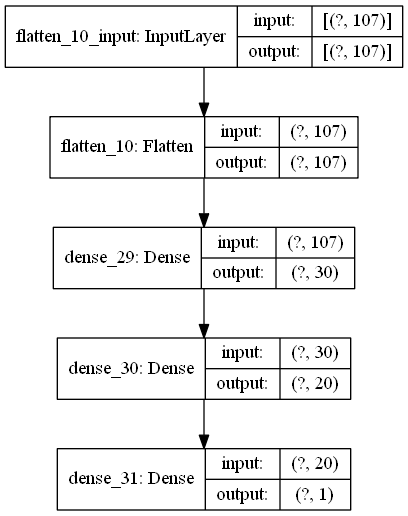

In [234]:
keras.utils.plot_model(model, "Mushroom.png", show_shapes=True)

In [235]:
model.compile(loss="Hinge",
              optimizer="sgd",
              metrics=["accuracy"])

In [236]:
history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
204/204 [==============================] - 0s 672us/step - loss: 1.0355 - accuracy: 0.4822
Epoch 2/30
204/204 [==============================] - 0s 613us/step - loss: 1.0355 - accuracy: 0.4822
Epoch 3/30
204/204 [==============================] - 0s 635us/step - loss: 1.0355 - accuracy: 0.4822
Epoch 4/30
204/204 [==============================] - 0s 661us/step - loss: 1.0355 - accuracy: 0.4822
Epoch 5/30
204/204 [==============================] - 0s 700us/step - loss: 1.0355 - accuracy: 0.4822
Epoch 6/30
204/204 [==============================] - 0s 684us/step - loss: 1.0355 - accuracy: 0.4822
Epoch 7/30
204/204 [==============================] - 0s 680us/step - loss: 1.0355 - accuracy: 0.4822
Epoch 8/30
204/204 [==============================] - 0s 648us/step - loss: 1.0355 - accuracy: 0.4822
Epoch 9/30
204/204 [==============================] - 0s 678us/step - loss: 1.0355 - accuracy: 0.4822
Epoch 10/30
204/204 [==============================] - 0s 684us/step - loss: 1.035

In [237]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

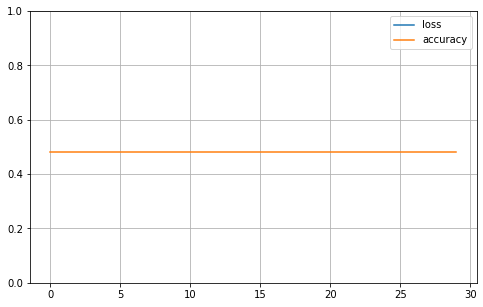

In [238]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [239]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 607us/step - loss: 1.0375 - accuracy: 0.4812


[1.0375384092330933, 0.481230765581131]

In [240]:
y_proba = model.predict(X_test)
y_proba.round(2)


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [241]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[1.],
       [1.],
       [1.]], dtype=float32)

In [242]:
model.predict_classes(X_new)

array([[1],
       [1],
       [1]])

In [243]:
y_new = y_test[:3]
y_new

1971    0
6654    1
5606    1
Name: class, dtype: int64

# MODEL 2

In [244]:
optimizer = keras.optimizers.Adam(lr=0.01)

# activation~(relu,tanh,sigmoid)

In [245]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[107]))
model2.add(keras.layers.Dense(10, activation="relu"))
model2.add(keras.layers.Dense(5, activation="tanh"))
model2.add(keras.layers.Dense(1, activation="sigmoid"))

In [246]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 107)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1080      
_________________________________________________________________
dense_33 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 6         
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________


In [247]:
model2.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# epochs=50

In [248]:
history2 = model2.fit(X_train, y_train, epochs=50)

Epoch 1/50
204/204 [==============================] - 0s 665us/step - loss: 0.0677 - accuracy: 0.9774
Epoch 2/50
204/204 [==============================] - 0s 695us/step - loss: 0.0032 - accuracy: 0.9997
Epoch 3/50
204/204 [==============================] - 0s 661us/step - loss: 8.2906e-04 - accuracy: 1.0000
Epoch 4/50
204/204 [==============================] - 0s 655us/step - loss: 4.7467e-04 - accuracy: 1.0000
Epoch 5/50
204/204 [==============================] - 0s 717us/step - loss: 3.1495e-04 - accuracy: 1.0000
Epoch 6/50
204/204 [==============================] - 0s 658us/step - loss: 2.2565e-04 - accuracy: 1.0000
Epoch 7/50
204/204 [==============================] - 0s 710us/step - loss: 1.6983e-04 - accuracy: 1.0000
Epoch 8/50
204/204 [==============================] - 0s 704us/step - loss: 1.3233e-04 - accuracy: 1.0000
Epoch 9/50
204/204 [==============================] - 0s 784us/step - loss: 1.0580e-04 - accuracy: 1.0000
Epoch 10/50
204/204 [==============================] -

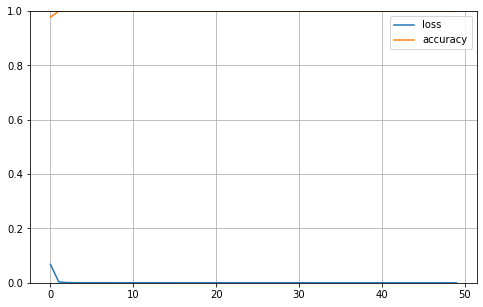

In [250]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [251]:
model2.evaluate(X_test, y_test)

51/51 [==============================] - 0s 608us/step - loss: 6.8477e-07 - accuracy: 1.0000


[6.847726012892963e-07, 1.0]

In [252]:
X_new = X_test[:3]
y_proba = model2.predict(X_new)
y_proba.round(2)

array([[0.],
       [1.],
       [1.]], dtype=float32)

In [253]:
model2.predict_classes(X_new)

array([[0],
       [1],
       [1]])

In [254]:
y_new = y_test[:3]
y_new

1971    0
6654    1
5606    1
Name: class, dtype: int64

# Model 3

In [255]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[107]))
model3.add(keras.layers.Dense(10, activation="tanh"))
model3.add(keras.layers.Dense(1, activation="sigmoid"))

In [256]:
model3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 107)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1080      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________


In [257]:
optimizer.learning_rate.assign(0.001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.001>

In [266]:
model3.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [267]:
history3 = model3.fit(X_train, y_train, epochs=20)

Epoch 1/20
204/204 [==============================] - 0s 706us/step - loss: 0.0566 - accuracy: 0.9860
Epoch 2/20
204/204 [==============================] - 0s 627us/step - loss: 0.0518 - accuracy: 0.9869
Epoch 3/20
204/204 [==============================] - 0s 581us/step - loss: 0.0477 - accuracy: 0.9886
Epoch 4/20
204/204 [==============================] - 0s 604us/step - loss: 0.0441 - accuracy: 0.9906
Epoch 5/20
204/204 [==============================] - 0s 603us/step - loss: 0.0409 - accuracy: 0.9909
Epoch 6/20
204/204 [==============================] - 0s 600us/step - loss: 0.0382 - accuracy: 0.9922
Epoch 7/20
204/204 [==============================] - 0s 624us/step - loss: 0.0357 - accuracy: 0.9934
Epoch 8/20
204/204 [==============================] - 0s 612us/step - loss: 0.0335 - accuracy: 0.9946
Epoch 9/20
204/204 [==============================] - 0s 627us/step - loss: 0.0315 - accuracy: 0.9951
Epoch 10/20
204/204 [==============================] - 0s 688us/step - loss: 0.029

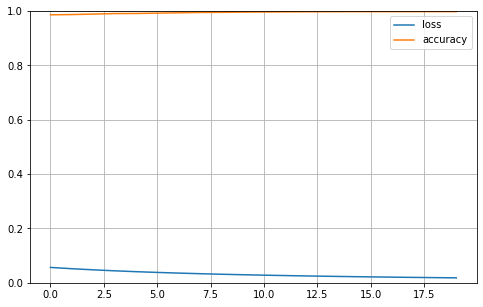

In [268]:
import pandas as pd

pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [269]:
model3.evaluate(X_test, y_test)

51/51 [==============================] - 0s 611us/step - loss: 0.0188 - accuracy: 0.9988


[0.018780333921313286, 0.998769223690033]

In [270]:
X_new = X_test[:6]
y_proba = model3.predict(X_new)
y_proba.round(2)

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [271]:
model3.predict_classes(X_new)

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [272]:
y_new = y_test[:6]
y_new

1971    0
6654    1
5606    1
3332    0
6988    1
5761    1
Name: class, dtype: int64